Mini Project - fixed acidity, volatile acidity, citric acid & residual sugar

Basic libraries

In [28]:
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, confusion_matrix, accuracy_score, r2_score
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import ConfusionMatrixDisplay


Data loading  

In [29]:
df = pd.read_csv('WineQT.csv')
print(df.info())
print(df.describe())


data = pd.DataFrame(df[['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar', 'quality']])
print(data['quality'].describe())
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1143 entries, 0 to 1142
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1143 non-null   float64
 1   volatile acidity      1143 non-null   float64
 2   citric acid           1143 non-null   float64
 3   residual sugar        1143 non-null   float64
 4   chlorides             1143 non-null   float64
 5   free sulfur dioxide   1143 non-null   float64
 6   total sulfur dioxide  1143 non-null   float64
 7   density               1143 non-null   float64
 8   pH                    1143 non-null   float64
 9   sulphates             1143 non-null   float64
 10  alcohol               1143 non-null   float64
 11  quality               1143 non-null   int64  
 12  Id                    1143 non-null   int64  
dtypes: float64(11), int64(2)
memory usage: 116.2 KB
None
       fixed acidity  volatile acidity  citric acid  residual sugar  \

Data Preperation

Log transformation to remove outliers

In [30]:
if 'residual sugar' in data.columns:
    data['residual sugar'] = np.log1p(data['residual sugar'])

Correlation analysis

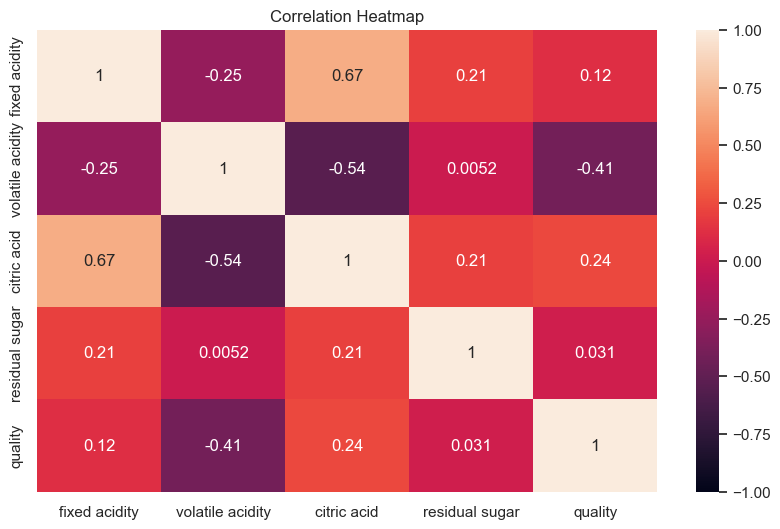

In [31]:
correlation_matrix = data[['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar', 'quality']].corr()
plt.figure(figsize=(10, 6))
sb.heatmap(correlation_matrix, annot=True, vmin=-1, vmax=1)
plt.title('Correlation Heatmap')
plt.show()

Exploratory Data Analysis

Boxplots, Scatterplots, and Violin Plots for fixed acidity, volatile acidity, critric acid, residual sugar and the effect on quality

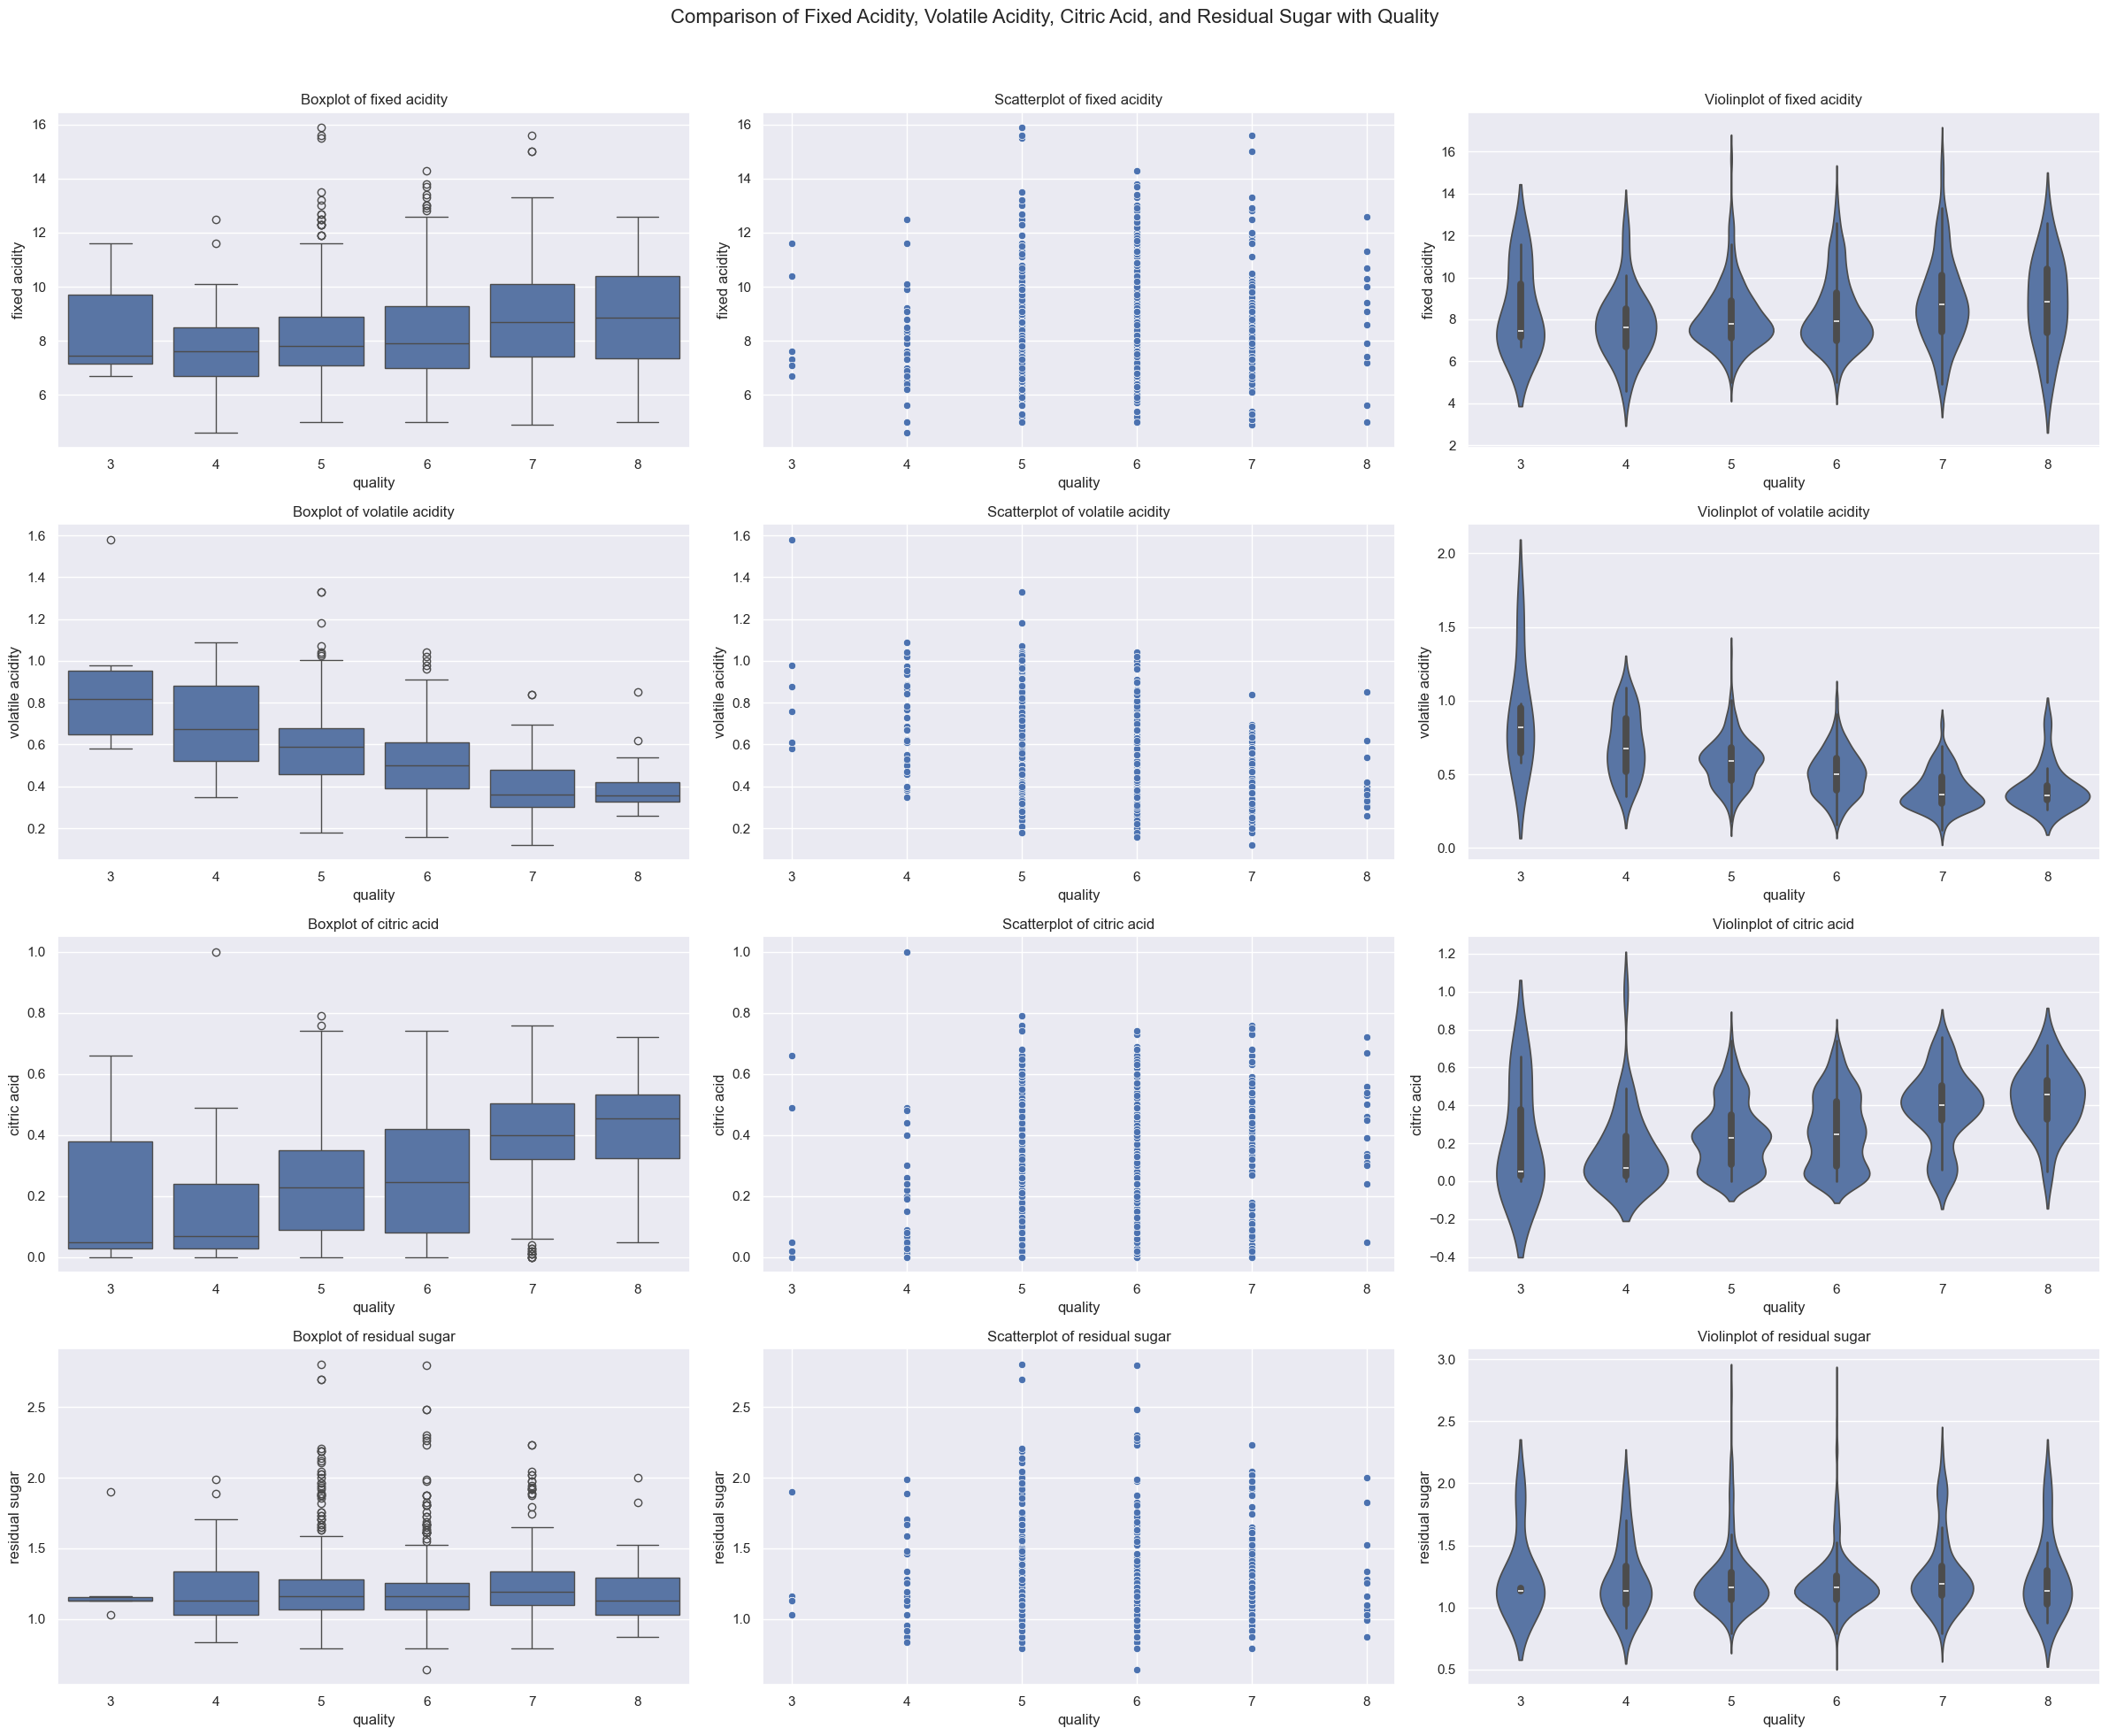

In [32]:
fig, axes = plt.subplots(4, 3, figsize=(24, 20))
fig.suptitle('Comparison of Fixed Acidity, Volatile Acidity, Citric Acid, and Residual Sugar with Quality', fontsize=16)

features = ['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar']
for i, feature in enumerate(features):
    
    sb.boxplot(x='quality', y=feature, data=data, ax=axes[i, 0])
    axes[i, 0].set_title(f'Boxplot of {feature}')
    
    
    sb.scatterplot(x='quality', y=feature, data=data, ax=axes[i, 1])
    axes[i, 1].set_title(f'Scatterplot of {feature}')
    
    
    sb.violinplot(x='quality', y=feature, data=data, ax=axes[i, 2])
    axes[i, 2].set_title(f'Violinplot of {feature}')

plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()


Descision Tree Model

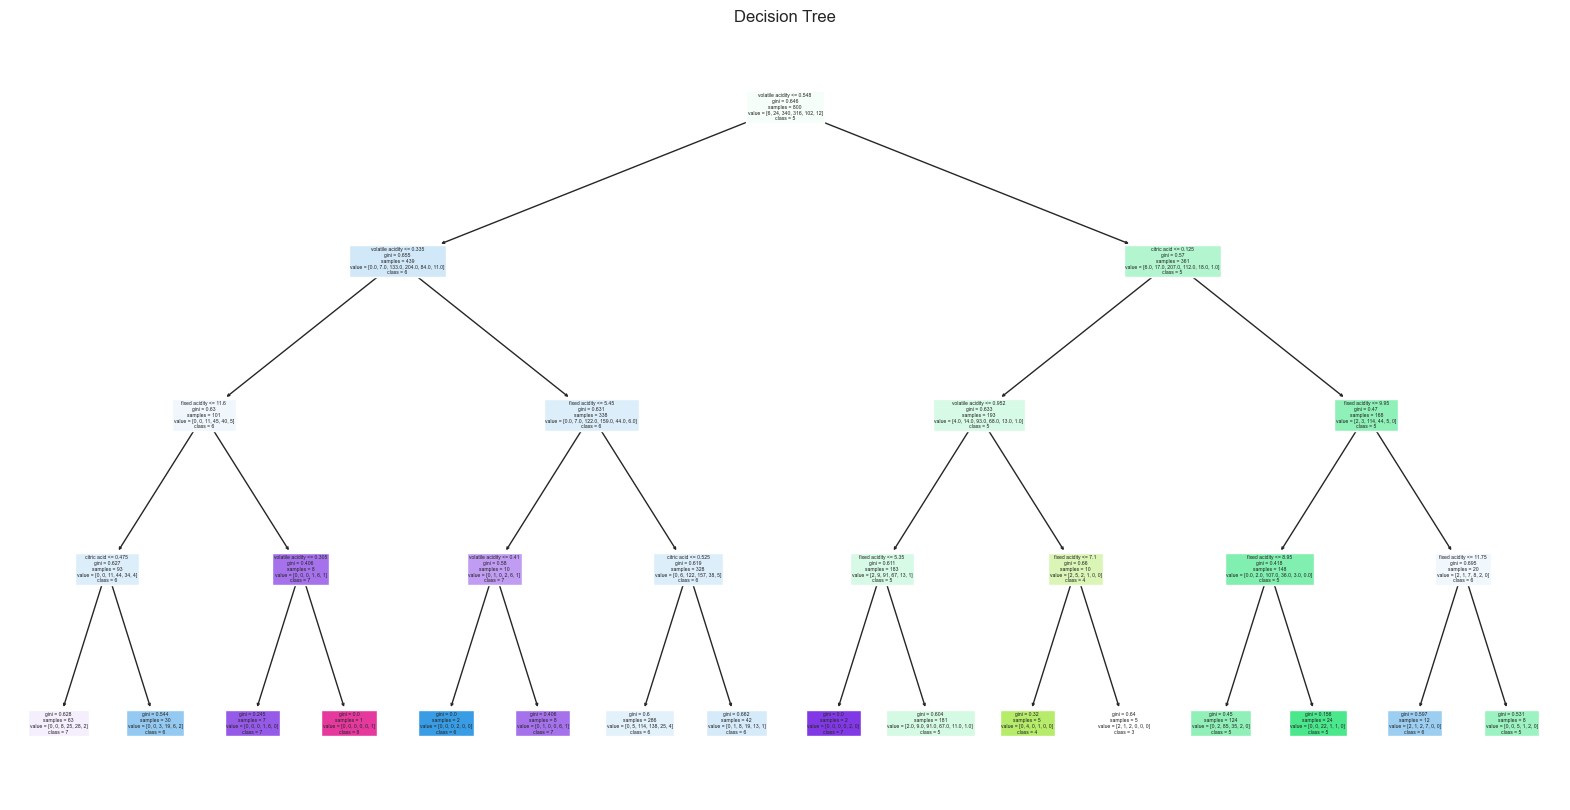

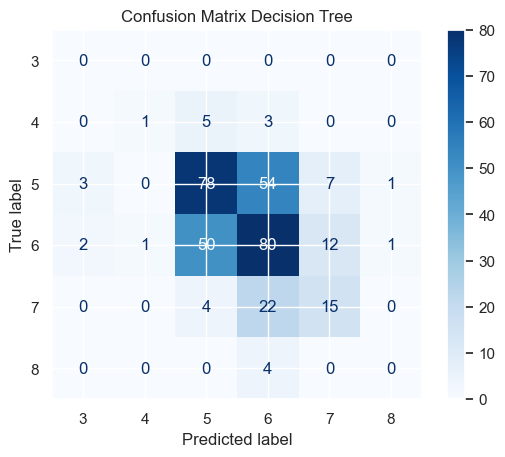

Decision Tree Model Evaluation:
Train Accuracy: 0.54625
Test Accuracy: 0.5072886297376094
Mean Squared Error (Test): 0.7638483965014577


In [33]:
# Predictor and response variables
X = data[['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar']]
y = data['quality']

# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Decision Tree Model and Plot
model = DecisionTreeClassifier(max_depth=4, random_state=42)
model.fit(X_train, y_train)

plt.figure(figsize=(20, 10))
plot_tree(model, feature_names=['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar'], 
          class_names=[str(i) for i in sorted(y.unique())], filled=True)
plt.title('Decision Tree')
plt.show()

# Evaluate Decision Tree model
y_pred = model.predict(X_test)
conf_matrix = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=sorted(y.unique()))
disp.plot(cmap='Blues')
plt.title('Confusion Matrix Decision Tree')
plt.show()

print("Decision Tree Model Evaluation:")
print(f"Train Accuracy: {accuracy_score(y_train, model.predict(X_train))}")
print(f"Test Accuracy: {accuracy_score(y_test, y_pred)}")
print(f"Mean Squared Error (Test): {mean_squared_error(y_test, y_pred)}")

Random Forest Model

In [34]:
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)
y_rf_pred = rf_model.predict(X_test)

Confusions Model for Random Forest

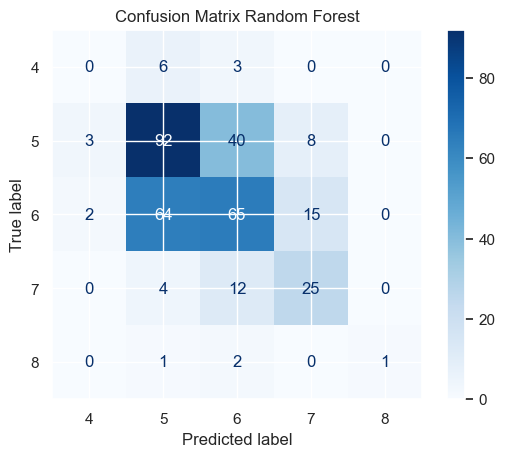

Random Forest Model Evaluation:
Random Forest Test Accuracy: 0.5335276967930029
Random Forest Mean Squared Error: 0.6559766763848397


In [35]:
rf_conf_matrix = confusion_matrix(y_test, y_rf_pred)
all_labels = sorted(np.unique(np.concatenate((y_test, y_rf_pred)))) 
rf_disp = ConfusionMatrixDisplay(confusion_matrix=rf_conf_matrix, display_labels=all_labels)
rf_disp.plot(cmap='Blues')
plt.title('Confusion Matrix Random Forest')
plt.show()

print("Random Forest Model Evaluation:")
print(f"Random Forest Test Accuracy: {accuracy_score(y_test, y_rf_pred)}")
print(f"Random Forest Mean Squared Error: {mean_squared_error(y_test, y_rf_pred)}")

Linear Regression Model

Linear Regression Model Evaluation:
Coefficients: [ 1.93302175e-03 -2.02778033e+00 -5.77869169e-02  1.07975595e-02]
Intercept: 6.7100671198236
Train Mean Squared Error: 0.5514423193118908
Test Mean Squared Error: 0.5210000756350238
Train R^2 Score: 0.18606299732562237
Test R^2 Score: 0.10392465501454728


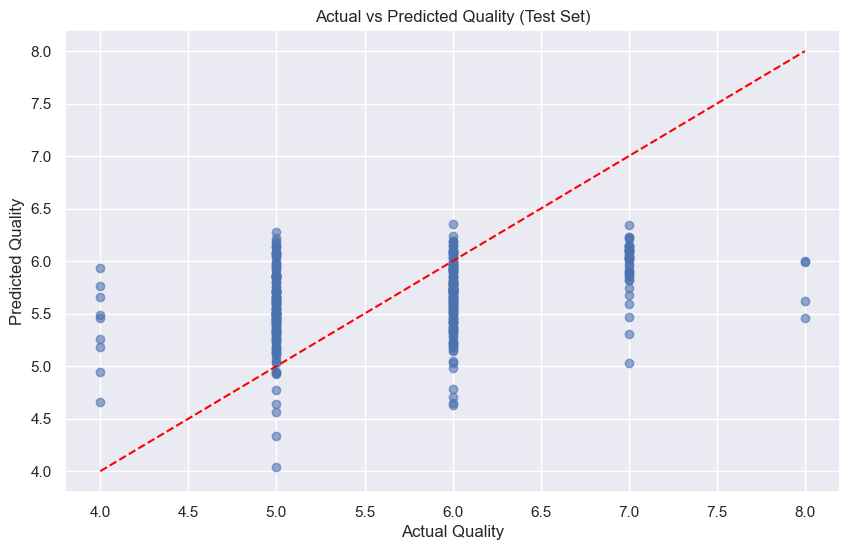

In [36]:
lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)

y_pred_train = lin_reg.predict(X_train)
y_pred_test = lin_reg.predict(X_test)

print("Linear Regression Model Evaluation:")
print("Coefficients:", lin_reg.coef_)
print("Intercept:", lin_reg.intercept_)

mse_train = mean_squared_error(y_train, y_pred_train)
mse_test = mean_squared_error(y_test, y_pred_test)
r2_train = r2_score(y_train, y_pred_train)
r2_test = r2_score(y_test, y_pred_test)

print(f'Train Mean Squared Error: {mse_train}')
print(f'Test Mean Squared Error: {mse_test}')
print(f'Train R^2 Score: {r2_train}')
print(f'Test R^2 Score: {r2_test}')

plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_test, alpha=0.6)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--')
plt.xlabel('Actual Quality')
plt.ylabel('Predicted Quality')
plt.title('Actual vs Predicted Quality (Test Set)')
plt.show()